# DMLL Portfolio (FIRE) Data Exploration and Visualization (Getting to know our data) - Group 3

## LAB2

## Setup

In [12]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [13]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [14]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [15]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download the dataset stored in our github package "DMLL-F21DL"

In [16]:
dataset = pd.read_csv("datasets/forestfire/fire_archive.csv")
fire_data = dataset

In [17]:
#fetch_fire_data()
# calling the function fetch_fire_data, (defined above) creates a datasets/fire directory in our workspace, 
# downloads fire_archive.csv file to this directory 

`load_fire_data` function loads the `fire_archive.csv` into a panda `dataframe`

In [18]:
def load_fire_data(fire_path=FIRE_PATH):
    csv_path = os.path.join(fire_path, "fire_archive.csv")
    return pd.read_csv(csv_path)

In [139]:
fire = fire_data # "fire" now becomes a pandas DataFrame object containing all the data
fire.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .
#A1: There are totally 15 attributes in the dataset. The latitude and longitude attributes refer to the 
#    geographic location of the hotspots detected by the satellites. The brightness attribute is the pixel
#    measurement of the temperature in Kelvin. Scan and Track attributes refers to the pixel measurement of 
#    the scanned area. acq_date refers to the date of acquisition of data while acq_time refers to the time spent
#    during the acquisition of data. Satellite attribute refers to which satellite was used for acquiring the data 
#    while instrument refers to the instrument used by the satellites for measurmeent. Confidence refers to the
#    quality of the hostpot in the specified region of interest. This parameter can be used to predict whether an 
#    hostspot is a fired area or not. This will be our target feature (Values greater than 60% or 70% ususally
#    mean the hotspot is actually a firespot). Version attribute refers to the collection of source. bright_t31 
#    is the pixel measurement of temperature in the 3-1 Channel. frp attribute depicts the pixel-integrated 
#    fire radiative power in MW (Mega Watts). Daynight attribute refers to when the instance were obtained, whether
#    day or night. Finally the type attribute refers to the type of environment of the instance.

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [20]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
fire.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 
#A2: There are no missing values in the dataset, fortunately. This will probably help us in accurately predicting 
#     the target feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


All attributes are numerical, except the acq_date, satellite, instrument and daynight. We need to explore the 
possibility of changing the data type of acq_date as it cannot be considered as a categorical data.

In [21]:
print(fire["daynight"].value_counts())
print(fire["instrument"].value_counts())
print(fire["satellite"].value_counts())
# Q3 What does the value_count() method display?
# A3: The value_count() displays the number of values in each category of an attribute across the dataset. Here
#     there are 28,203 values indicating that the respective measurements were taken during daytime while 7,808 
#     values indicating that those measurements were taken during night time. The satelliete dataset has two 
#     categories indicating the model of satellite that was used for measurmenet. It is observed that the 
#     instrument attribute has only one category  across the entire dataset, which clearly indicates that the 
#     attribute can dropped from the dataset when processing. 

D    28203
N     7808
Name: daynight, dtype: int64
MODIS    36011
Name: instrument, dtype: int64
Aqua     20541
Terra    15470
Name: satellite, dtype: int64


In [22]:
#This method shows a statistical summary of the numerical attributes 
fire.describe() 

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

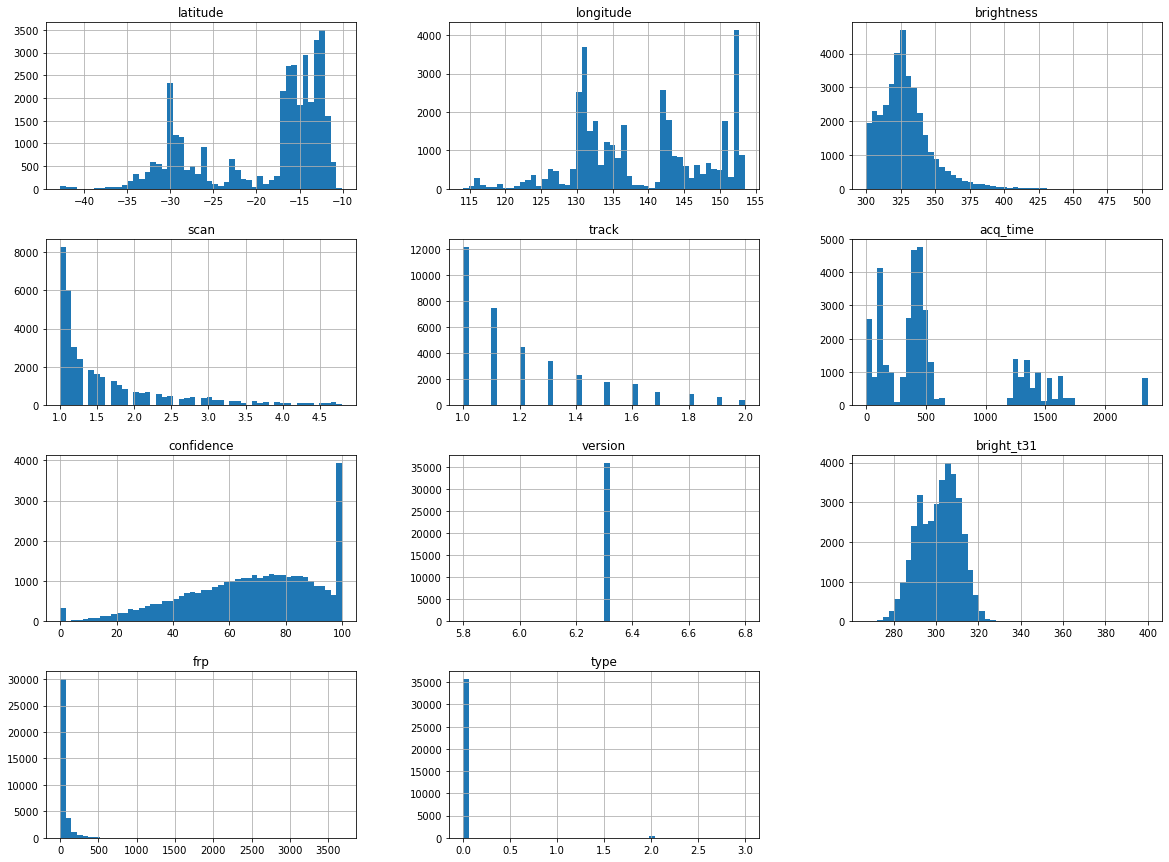

In [23]:
#To plot a histogram for each numerical attribute
fire.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram
# A4: The statistical summary and the histograms do not consider the categorical data or more precisely they do not
#     consider the object type of data. While the acq_date is not a categorical data, we have to consider the 
#     activity of changing the data type.


# Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

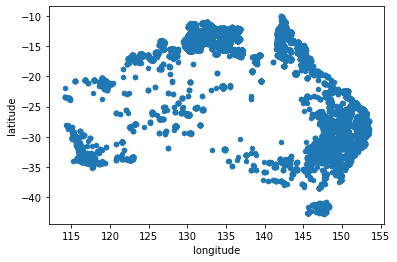

In [24]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
# A5: The first plot does not help us in finding any particular pattern. The second plot is comparitively better
#     in representing the density of areas where the measurement were taken. The third plot is more indicative
#     as we can understand the different confidence levels of hotspot across the areas.
fire.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

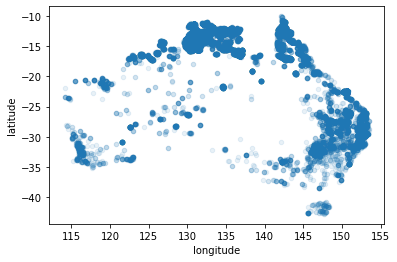

In [25]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The above plot helps us  to better understand the density of the areas where the measurements were taken 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


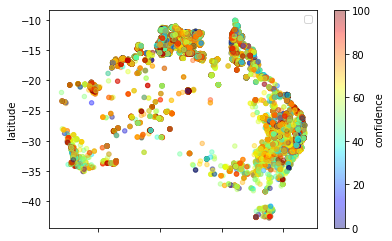

In [26]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #s=fire["brightness"]/100, label="brightness", figsize=(10,7),
    c="confidence", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots the confidence of the hotspots with red being high confidence and blue being low confidence. 


In [27]:
# Now we will look at the correlation of all the attributes with the expected class attribute (confidence)
corr_matrix = fire.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [28]:
corr_matrix["confidence"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.confidence)?
# Does that make sense?
# A6: The most correlated attributes with the target attribute confidence are the brightness and the frp such that
#     they have strong positive correlation. According to the definitions of these two attributes, it makes
#     sense that the brightness, which is the temperature of hotspot region, and the frp, which is the 
#     radiative power of the hotspot, can affect the confidence of the hotspot more than the other features. 
#     The scan, track and acq_time attributes have negative correlation with the confidence attribute. This may 
#     be due to the reason that the more amount of time the satellite spends on a particular region of interest,
#     the less likely it can be that that region has low confidence of hotspot

confidence    1.000000
brightness    0.614691
frp           0.355388
bright_t31    0.238506
latitude      0.020656
longitude    -0.035529
type         -0.041632
acq_time     -0.070012
scan         -0.103808
track        -0.105949
version            NaN
Name: confidence, dtype: float64

array([[<AxesSubplot:xlabel='confidence', ylabel='confidence'>,
        <AxesSubplot:xlabel='brightness', ylabel='confidence'>,
        <AxesSubplot:xlabel='frp', ylabel='confidence'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='confidence'>],
       [<AxesSubplot:xlabel='confidence', ylabel='brightness'>,
        <AxesSubplot:xlabel='brightness', ylabel='brightness'>,
        <AxesSubplot:xlabel='frp', ylabel='brightness'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='brightness'>],
       [<AxesSubplot:xlabel='confidence', ylabel='frp'>,
        <AxesSubplot:xlabel='brightness', ylabel='frp'>,
        <AxesSubplot:xlabel='frp', ylabel='frp'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='frp'>],
       [<AxesSubplot:xlabel='confidence', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='brightness', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='frp', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='bright_t31'>]],
      dtype=object)

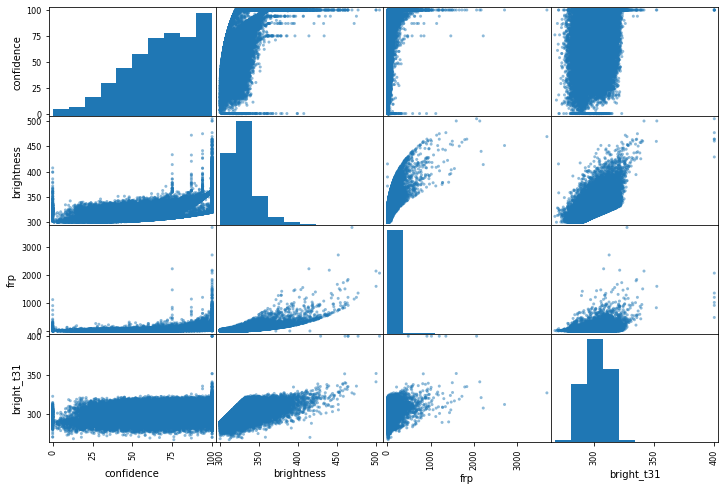

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["confidence", "brightness", "frp",
              "bright_t31"]
scatter_matrix(fire[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(300.0, 500.0, 0.0, 100.0)

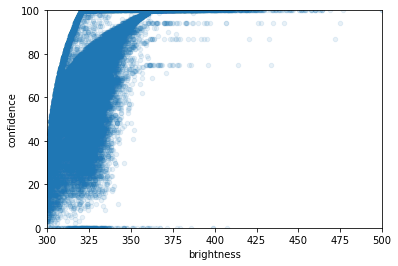

In [30]:
# let’s zoom in on the correlation scatterplot "confidence & the brightness,"
fire.plot(kind="scatter", x="brightness", y="confidence",
             alpha=0.1)
plt.axis([300, 500, 0, 100])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?
#A7:  Due to the upward trend, it can be concluded that the correlation is very strong. There are straight  
#     horizontal lines at around 100, 90, 85, 75 and even around 0. This needs to be considered in order to prevent
#     data quirks

# Dealing with Null Values

Since this dataset does not have null values, we are inserting null values to some records to demonstrate the Data Cleaning Process

In [31]:
sample_incomplete_rows = fire[fire.isnull().any(axis=1)].head()
sample_incomplete_rows

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [32]:
sample_incomplete_rows.dropna(subset=["acq_time"])

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [33]:
sample_incomplete_rows.drop("acq_time", axis=1) 

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [34]:
median = fire["acq_time"].median() # calculate the median of total_bedrooms
fire["acq_time"].fillna(median, inplace=True)

In [35]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


## Scikit-Learn solution (optional)


In [36]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [37]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without cat. data
fire_num = fire.drop(["acq_date","satellite", "instrument", "version", "daynight"] ,axis=1) 

In [38]:
imputer.fit(fire_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [39]:
imputer.statistics_

array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [40]:
fire_num.median().values #Check that this is the same as manually computing the median of each attribute


array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [41]:
X = imputer.transform(fire_num) # transform the data set

In [42]:
fire_tr = pd.DataFrame(X, columns=fire_num.columns,
                          index=fire_num.index) # load the new tranformed data set into the pandas frame fire_tr

### Handling Text and Categorical Attributes

In [43]:
fire_cat = fire[["daynight", "satellite"]]
fire_cat.head(10)  # look at the values for the first 10 instances 

,daynight,satellite
0,D,Terra
1,D,Terra
2,D,Terra
3,D,Terra
4,D,Terra
5,D,Terra
6,D,Terra
7,D,Terra
8,D,Terra
9,D,Terra


In [44]:
fire_cat.tail(10)
# look at the values for the last 10 instances

,daynight,satellite
36001,N,Aqua
36002,N,Aqua
36003,N,Aqua
36004,N,Aqua
36005,N,Aqua
36006,N,Aqua
36007,N,Aqua
36008,N,Aqua
36009,N,Aqua
36010,N,Aqua


In [45]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
fire_cat_encoded = ordinal_encoder.fit_transform(fire_cat)
fire_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?
# A15: There may be a possibility that nearby values are more similar than distant values.However as far as this
# dataset is considered the categorical values have only binary classification. 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [46]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

In [47]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

<36011x4 sparse matrix of type '<class 'numpy.float64'>'
	with 72022 stored elements in Compressed Sparse Row format>

In [48]:
type(fire_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse.csr.csr_matrix

In [49]:
fire_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [50]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [51]:
cat_encoder.categories_         # Get a list of categories

[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [52]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set
#A16: Normalisation or Standardisation need to be done on the dataset inorder to scale the values. For eg, 
#     brightness attribute has a min and max values of 300.000000 and 504.4 while frp attribute has a min and max 
#     values of 0 and 3679.5. To avoid the numerical values frm having such different scales, we perform
#     normalisation or standarisation

In [53]:
#Normalisation using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

temp_fire = fire.drop(["acq_date","daynight", "satellite", "instrument"] , axis=1)
#temp_fire.head()
minmax_scaler = MinMaxScaler() #Initialising the MinMaxScaler as a class
print(minmax_scaler.fit(temp_fire)) #Fitting the data 
print(minmax_scaler.data_max_) #Max value of each attribute

MinMaxScaler()
[-1.007260e+01  1.534904e+02  5.044000e+02  4.800000e+00  2.000000e+00
  2.359000e+03  1.000000e+02  6.300000e+00  4.001000e+02  3.679500e+03
  3.000000e+00]


In [54]:
#print(minmax_scaler.transform(temp_fire)) #Transform features by scaling each feature to a given range(0,1)
fire_norm = minmax_scaler.transform(temp_fire) #Normalised data of 11 numerical attributes
print(fire_norm)

[[0.94694434 0.70974278 0.06360078 ... 0.22764838 0.00179372 0.        ]
 [0.94739096 0.71042068 0.0944227  ... 0.22764838 0.00307107 0.        ]
 [0.91535078 0.47656661 0.05675147 ... 0.23816679 0.00627803 0.        ]
 ...
 [0.44260053 0.36581434 0.00831703 ... 0.17580766 0.00149477 0.        ]
 [0.44241699 0.36684769 0.01761252 ... 0.17505635 0.00154912 0.        ]
 [0.3639837  0.18776167 0.04452055 ... 0.17956424 0.00625085 0.66666667]]


In [55]:
# Standarization using StandardScaler()
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler() #Initialising the StandardScaler as a class
print(standard_scaler.fit(temp_fire)) #Fitting the data

StandardScaler()


In [56]:
print(standard_scaler.mean_) #Mean value of each attribute

[-1.91009616e+01  1.38931446e+02  3.28750696e+02  1.62090472e+00
  1.21528144e+00  6.00025798e+02  6.75513871e+01  6.30000000e+00
  3.01339138e+02  5.11321763e+01  1.94385049e-02]


In [57]:
fire_standard = standard_scaler.transform(temp_fire) #Standardize features by removing the mean and scaling to unit variance
print(fire_standard)

[[ 1.00389302  0.33762684 -0.82930942 ... -0.41536427 -0.4825828
  -0.0980141 ]
 [ 1.00590247  0.34050981 -0.4976003  ... -0.41536427 -0.43165021
  -0.0980141 ]
 [ 0.86174521 -0.65401884 -0.90302256 ... -0.27139544 -0.30377689
  -0.0980141 ]
 ...
 [-1.26528325 -1.12502328 -1.42427974 ... -1.12492494 -0.49450319
  -0.0980141 ]
 [-1.26610905 -1.12062864 -1.32424049 ... -1.13520843 -0.49233585
  -0.0980141 ]
 [-1.61900119 -1.88224111 -1.03465316 ... -1.0735075  -0.30486056
   9.98651662]]


In order to best eliminate outliers in the data set, we are going to use the standardised dataset for further processing

End of LAB2

## LAB 3 

In [58]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [59]:
fire['instrument'].value_counts()

MODIS    36011
Name: instrument, dtype: int64

In [60]:
fire['version'].value_counts()

6.3    36011
Name: version, dtype: int64

From the above output, it is very evident that the attributes instrument and version have the same values for all the instances. So we are dropping these 

In [61]:
fire = fire.drop(['instrument','version'], axis = 1)

In [62]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [63]:
fire = fire.drop(['acq_date'], axis=1) #Temporarily dropping acq_date due as it is in String

Changing categorical data to numerical

In [64]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

fire['daynight'] = fire['daynight'].map(daynight_map)
fire['satellite'] = fire['satellite'].map(satellite_map)

### Correlation
We are finding the correlation of the attributes with respect to the class attribute.

In [65]:
corr_matrix = fire.corr()
corr_matrix["confidence"].sort_values(ascending=False)

confidence    1.000000
brightness    0.614691
frp           0.355388
bright_t31    0.238506
daynight      0.066457
latitude      0.020656
satellite    -0.031723
longitude    -0.035529
type         -0.041632
acq_time     -0.070012
scan         -0.103808
track        -0.105949
Name: confidence, dtype: float64

### Univariate Selection
We are finding the best features using Univariate Selection
Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Due to using chi square method in Univariate Selection, it does not take negative values(Like Latitide and Longitude). For the purpose of demonstrating the Univariate Selection Method, we are dropping the latitude and longitude attrbutes
Ref: https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

uni_fire_attributes = fire.drop(['confidence','latitude','longitude'], axis=1)
uni_fire_class = fire["confidence"]

In [67]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(uni_fire_attributes,uni_fire_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(uni_fire_attributes.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs         Score
6         frp  1.539160e+06
3    acq_time  9.740641e+05
0  brightness  2.088148e+04
5  bright_t31  7.552044e+02
7    daynight  6.482230e+02
8        type  5.583034e+02
1        scan  2.400399e+02
4   satellite  1.142584e+02
2       track  3.095680e+01


### Feature Importance
We are finding the best features using Feature Importance
Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.13989888 0.13842132 0.21572864 0.05911206 0.02992384 0.08952373
 0.00668369 0.13925539 0.17466274 0.00476994 0.00201977]


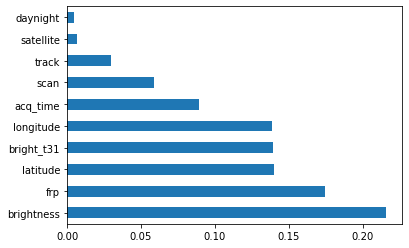

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
featimp_fire_attributes = fire.drop(['confidence'], axis=1)
featimp_fire_class = fire["confidence"]
model = ExtraTreesClassifier()
model.fit(featimp_fire_attributes,featimp_fire_class)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=featimp_fire_attributes.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap
We are finding the best features using Correlation Matrix with Heatmap
Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [69]:
!pip install seaborn

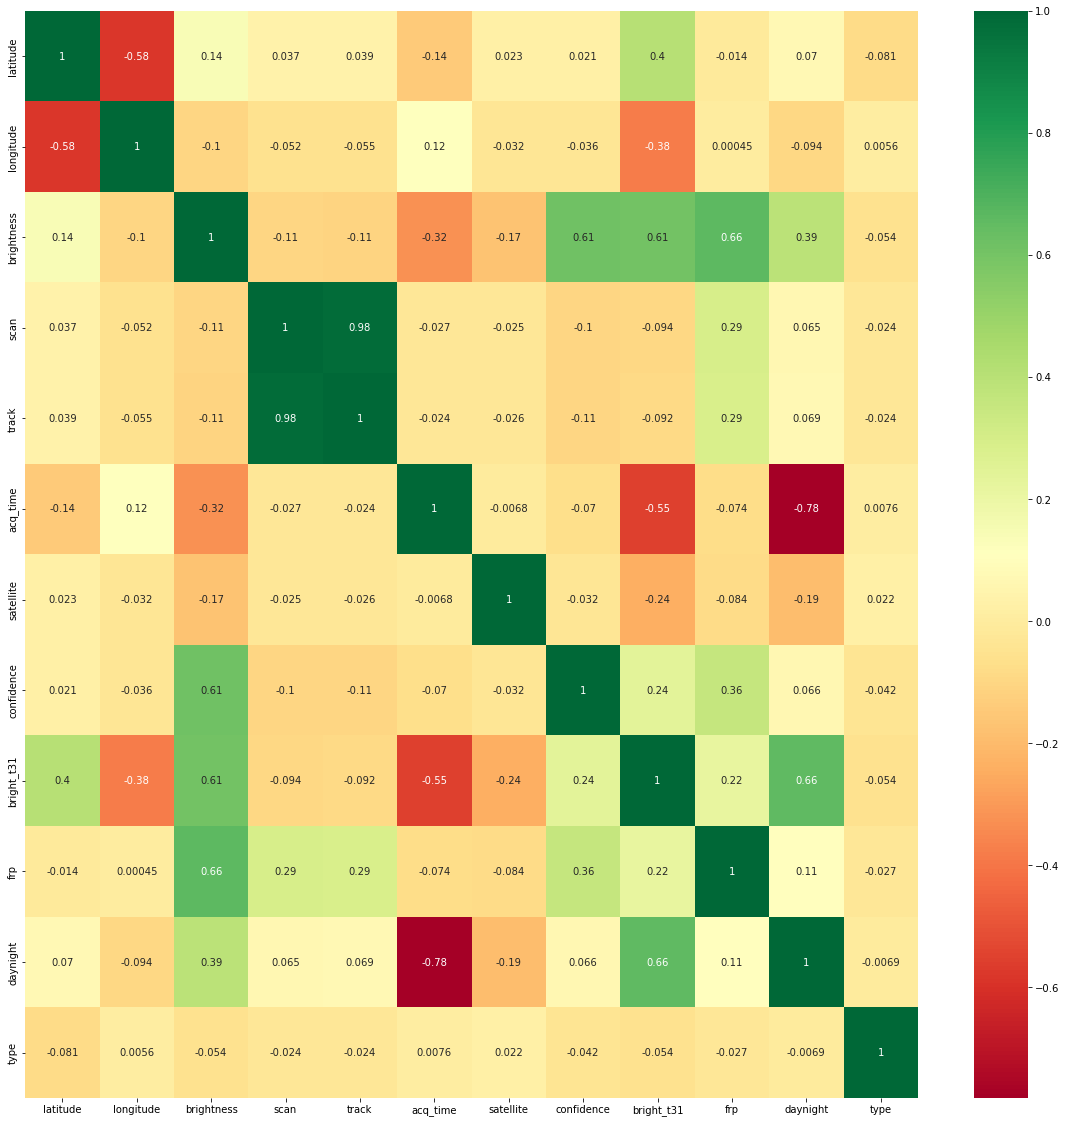

In [70]:
import seaborn as sns
corr_matrix = fire.corr()

top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(fire[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Due to the incompatibility of negative values, the results of Univariate Selection are ignored. As for the other two methods, Feature Importance and Correlation with HeatMap, yield the same results as correlation matrix

### Creating 3 Datasets with Correlating Features  

We are now using Binning method to classify the target feature into 3 classes. If the confidence value is greater than 70%, we are classifying as HIGH Confidence (numerical value is 2). Confidence values between 40% and 70% are classified as MEDIUM Confidence (numerical value is 1) while values less than 40% are classified as LOW Confidence (numerical value is 0).

In [137]:
bins = [0.0, 40.0, 70.0, 100.0] 
labels = [0,1,2]
fire_class = fire
fire_class['conf_cat'] = pd.cut(fire['confidence'], bins=bins, labels=labels)

low_class= fire_class[fire_class.conf_cat == 0] #prints the instances that have low confidence
mid_class= fire_class[fire_class.conf_cat == 1] #prints the instances that have mid confidence
high_class= fire_class[fire_class.conf_cat == 2] #prints the instances that have high confidence
high_class

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight,type,conf_cat
1,-11.7924,142.0850,319.3,1.0,1.0,56,1,71,297.3,11.3,1,0,2
7,-14.3195,143.5198,322.9,1.2,1.1,57,1,79,290.9,20.4,1,0,2
8,-13.1654,141.9715,317.2,1.0,1.0,57,1,72,300.0,9.9,1,0,2
12,-12.7626,142.1759,335.2,1.0,1.0,57,1,88,301.7,30.1,1,0,2
21,-12.6491,134.3953,324.9,2.4,1.5,57,1,79,300.6,57.7,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,-16.7117,124.8318,325.0,2.1,1.4,1641,0,100,294.9,60.9,0,0,2
36000,-16.7083,124.8126,315.2,2.1,1.4,1641,0,91,294.3,33.9,0,0,2
36005,-28.0640,131.6209,323.5,1.2,1.1,1644,0,100,293.9,27.4,0,0,2
36006,-28.0656,131.6334,312.7,1.2,1.1,1644,0,85,292.9,14.2,0,0,2


# Finding Correlating Features for each class Using Feature Importance

[0.14917958 0.14940739 0.15164312 0.07815101 0.05062904 0.10403833
 0.0127862  0.15080243 0.14865293 0.00196089 0.00274908 0.        ]


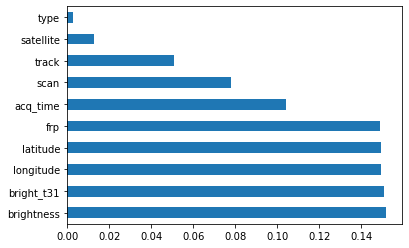

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
featimp_fire_attributes = low_class.drop(['confidence'], axis=1)
featimp_fire_class = low_class["confidence"]
model = ExtraTreesClassifier()
model.fit(featimp_fire_attributes,featimp_fire_class)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=featimp_fire_attributes.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.15266183 0.15193239 0.16569537 0.07239861 0.04159241 0.0998965
 0.00679407 0.14986676 0.15496308 0.00133581 0.00286317 0.        ]


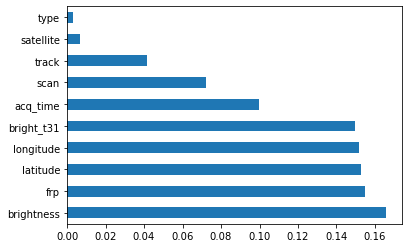

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
featimp_fire_attributes = mid_class.drop(['confidence'], axis=1)
featimp_fire_class = mid_class["confidence"]
model = ExtraTreesClassifier()
model.fit(featimp_fire_attributes,featimp_fire_class)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=featimp_fire_attributes.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.1195831  0.11914334 0.25914292 0.0550879  0.0307197  0.0840697
 0.00598249 0.12266977 0.18747944 0.01415838 0.00196325 0.        ]


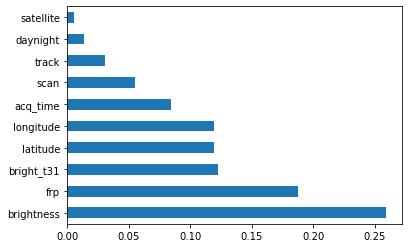

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
featimp_fire_attributes = high_class.drop(['confidence'], axis=1)
featimp_fire_class = high_class["confidence"]
model = ExtraTreesClassifier()
model.fit(featimp_fire_attributes,featimp_fire_class)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=featimp_fire_attributes.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Dataset 1 containing 2 most correlated features for the 3 classes (brightness frp and bright_t31)

In [99]:
fire_class_dataset1 = fire_class
fire_class_dataset1 = fire_class_dataset1.drop(['latitude', 'longitude', 'scan', 'track','acq_time','satellite','daynight','type'], axis=1)
fire_class_dataset1.head()

,brightness,confidence,bright_t31,frp,conf_cat
0,313.0,48,297.3,6.6,1
1,319.3,71,297.3,11.3,2
2,311.6,42,298.7,23.1,1
3,310.1,33,296.1,6.5,0
4,310.3,36,298.8,27.6,0


Dataset2 containing top 5 correlated features(brightness, frp, latitude, longitude, bright_t31)

In [73]:
fire_class_dataset2 = fire_class
fire_class_dataset2 = fire_class_dataset2.drop([ 'scan', 'track','acq_time','satellite','daynight','type'], axis=1)
fire_class_dataset2.head()

,latitude,longitude,brightness,confidence,bright_t31,frp,conf_cat
0,-11.8070,142.0583,313.0,48,297.3,6.6,1
1,-11.7924,142.0850,319.3,71,297.3,11.3,2
2,-12.8398,132.8744,311.6,42,298.7,23.1,1
3,-14.4306,143.3035,310.1,33,296.1,6.5,0
4,-12.4953,131.4897,310.3,36,298.8,27.6,0


Dataset3 containing top 7 correlated features(brightness, frp, latitude, longitude, bright_t31, scan, acq_time, track)

In [100]:
fire_class_dataset3 = fire_class
fire_class_dataset3 = fire_class_dataset3.drop([ 'satellite','daynight','type','track'], axis=1)
fire_class_dataset3.head()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,conf_cat
0,-11.8070,142.0583,313.0,1.0,56,48,297.3,6.6,1
1,-11.7924,142.0850,319.3,1.0,56,71,297.3,11.3,2
2,-12.8398,132.8744,311.6,3.1,57,42,298.7,23.1,1
3,-14.4306,143.3035,310.1,1.1,57,33,296.1,6.5,0
4,-12.4953,131.4897,310.3,4.0,57,36,298.8,27.6,0


  # Scikit Learn PCA 

In [113]:
from sklearn.preprocessing import StandardScaler
features = ['bright_t31','latitude', 'longitude', 'scan', 'track','acq_time','satellite','daynight','type','brightness','frp']
# Separating out the features
x = fire_class.loc[:, features].values
# Separating out the target
y = fire_class.loc[:,['confidence']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.41536427,  1.00389302,  0.33762684, ..., -0.0980141 ,
        -0.82930942, -0.4825828 ],
       [-0.41536427,  1.00590247,  0.34050981, ..., -0.0980141 ,
        -0.4976003 , -0.43165021],
       [-0.27139544,  0.86174521, -0.65401884, ..., -0.0980141 ,
        -0.90302256, -0.30377689],
       ...,
       [-1.12492494, -1.26528325, -1.12502328, ..., -0.0980141 ,
        -1.42427974, -0.49450319],
       [-1.13520843, -1.26610905, -1.12062864, ..., -0.0980141 ,
        -1.32424049, -0.49233585],
       [-1.0735075 , -1.61900119, -1.88224111, ...,  9.98651662,
        -1.03465316, -0.30486056]])

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])

In [141]:
finalDf = pd.concat([principalDf, fire_class[['confidence']]], axis = 1)
finalDf


,component 1,component 2,confidence
0,-0.092919,-1.222000,48
1,0.057802,-1.226101,71
2,0.412299,2.429671,42
3,-0.315188,-0.837316,33
4,0.526831,3.724639,36
...,...,...,...
36006,-2.562868,-0.431047,85
36007,-2.817568,-0.840503,27
36008,-2.916588,-0.827088,43
36009,-2.880729,-0.830654,41


In [142]:
pca.explained_variance_ratio_

array([0.27704993, 0.19335851])

# Classifier